In [2]:

import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('EV_Statewise_Sales.csv')


In [8]:


# Filter the data to only include rows where ELECTRIC(BOV) is 1
ev_df = df[df['ELECTRIC(BOV)'] == 1]

# Group the filtered data by Vehicle Category and count the occurrences
ev_usage_by_category = ev_df.groupby('Vehicle Category').size()

# Print the results
print("Number of EV users by Vehicle Category:")
print(ev_usage_by_category)

Number of EV users by Vehicle Category:
Vehicle Category
2-Wheelers    707
3-Wheelers    742
4-Wheelers    464
Bus            58
Others        510
dtype: int64


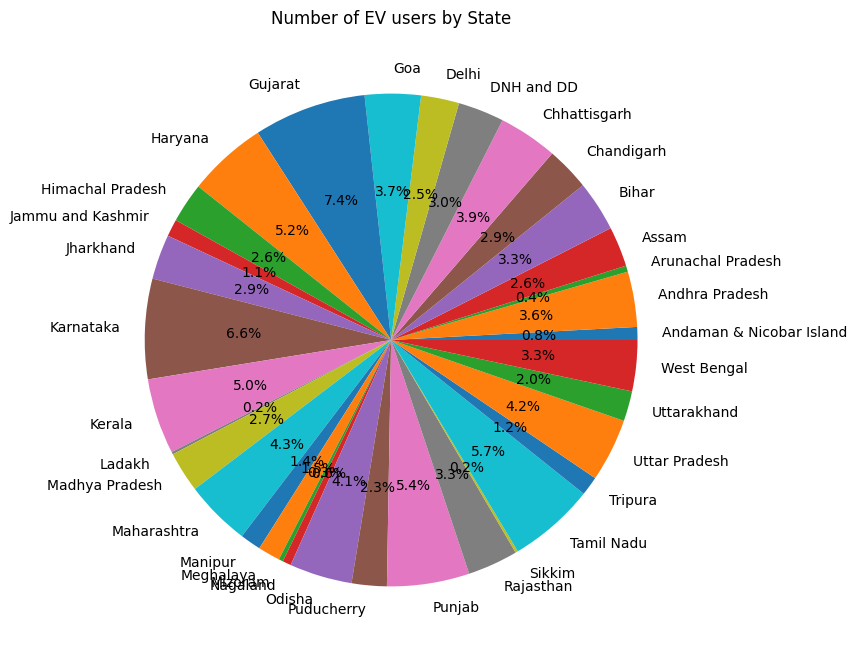

In [12]:


# Filter the data to only include rows where ELECTRIC(BOV) is 1
ev_df = df[df['ELECTRIC(BOV)'] == 1]

# Group the filtered data by State and count the occurrences
ev_usage_by_state = ev_df.groupby('State').size()

# Generate a pie chart
plt.figure(figsize=(10,8))
plt.pie(ev_usage_by_state, labels = ev_usage_by_state.index, autopct='%1.1f%%')
plt.title('Number of EV users by State')
plt.show()

In [10]:
import pandas as pd

# Load the dataset into a Pandas DataFrame
df = pd.read_csv('EV_Statewise_Sales.csv')

# Filter the data to only include rows where ELECTRIC(BOV) is 1
ev_df = df[df['ELECTRIC(BOV)'] == 1]

# Group the filtered data by Vehicle Category and count the occurrences
ev_usage_by_category = ev_df.groupby('State').size()

# Print the results
print("Number of EV users by Vehicle Category:")
print(ev_usage_by_category)

Number of EV users by Vehicle Category:
State
Andaman & Nicobar Island     21
Andhra Pradesh               90
Arunachal Pradesh            10
Assam                        65
Bihar                        82
Chandigarh                   71
Chhattisgarh                 96
DNH and DD                   75
Delhi                        62
Goa                          91
Gujarat                     183
Haryana                     129
Himachal Pradesh             65
Jammu and Kashmir            28
Jharkhand                    73
Karnataka                   163
Kerala                      123
Ladakh                        4
Madhya Pradesh               66
Maharashtra                 107
Manipur                      34
Meghalaya                    36
Mizoram                       7
Nagaland                     14
Odisha                      102
Puducherry                   57
Punjab                      134
Rajasthan                    82
Sikkim                        4
Tamil Nadu                

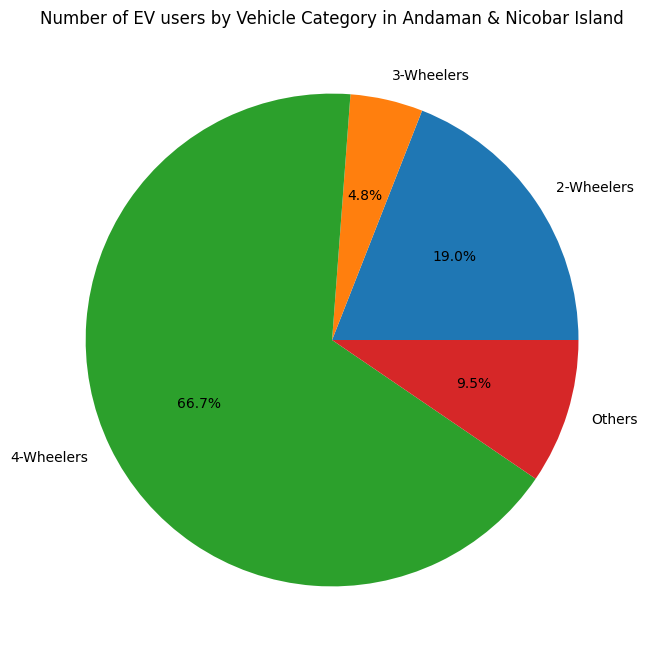

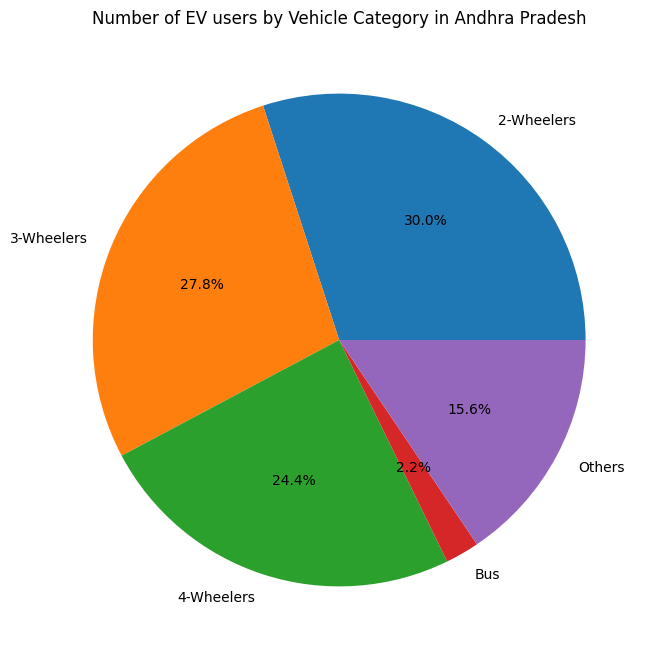

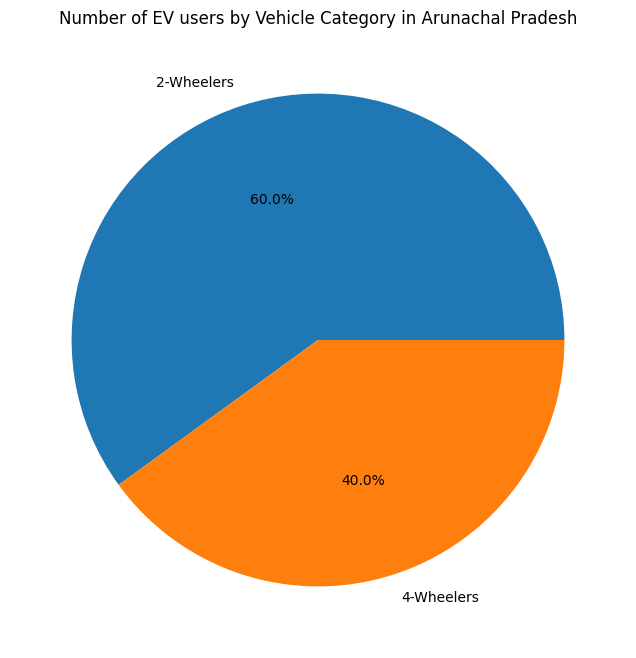

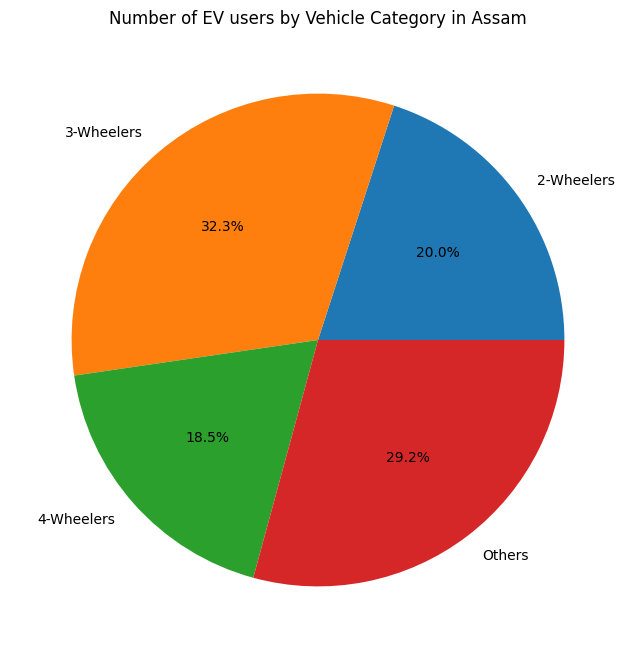

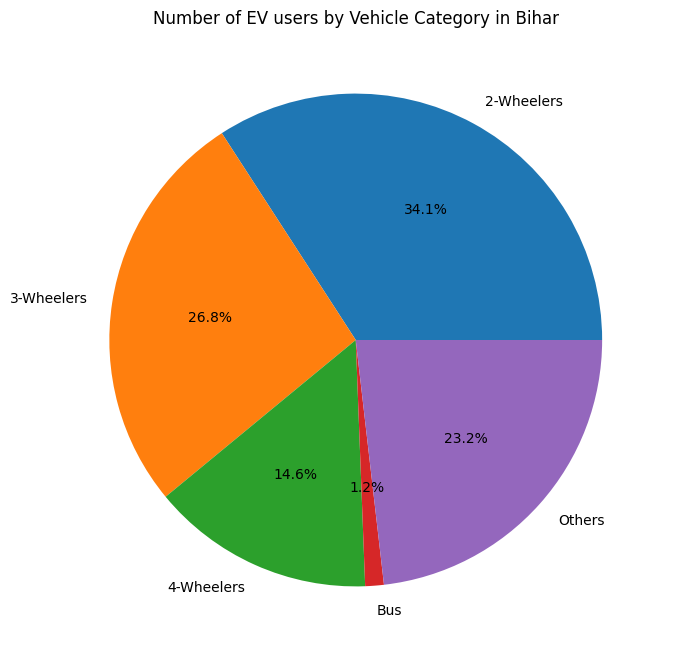

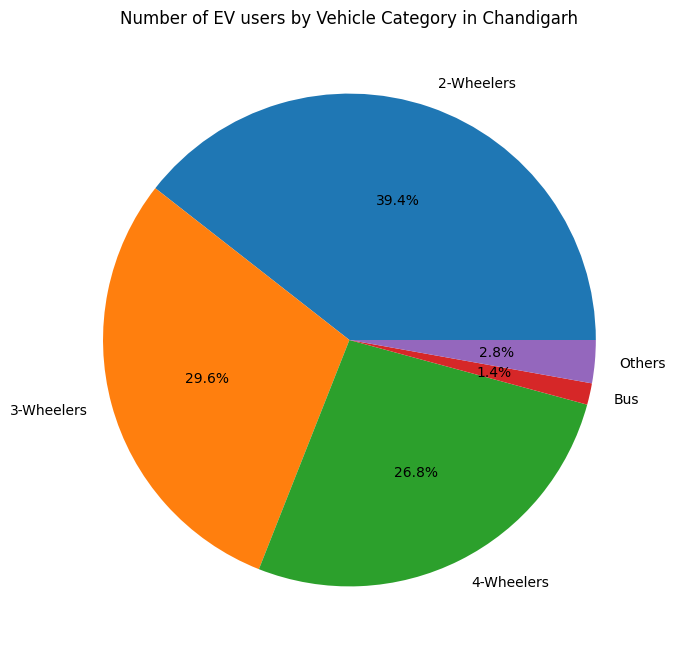

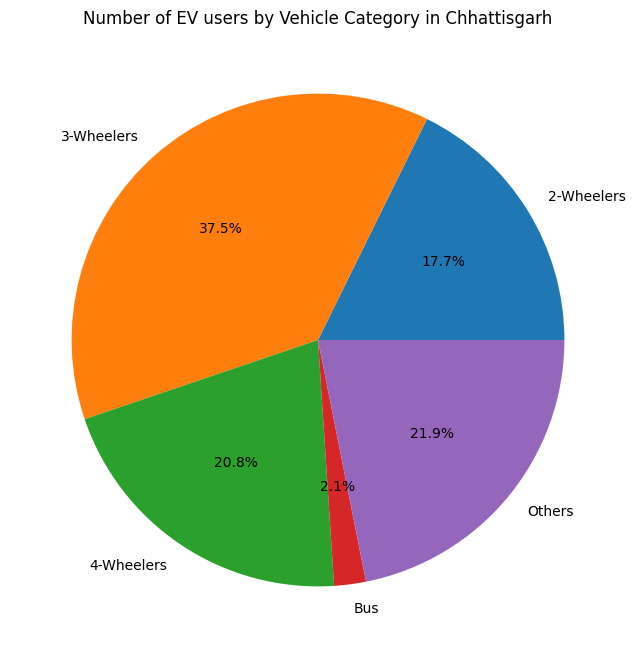

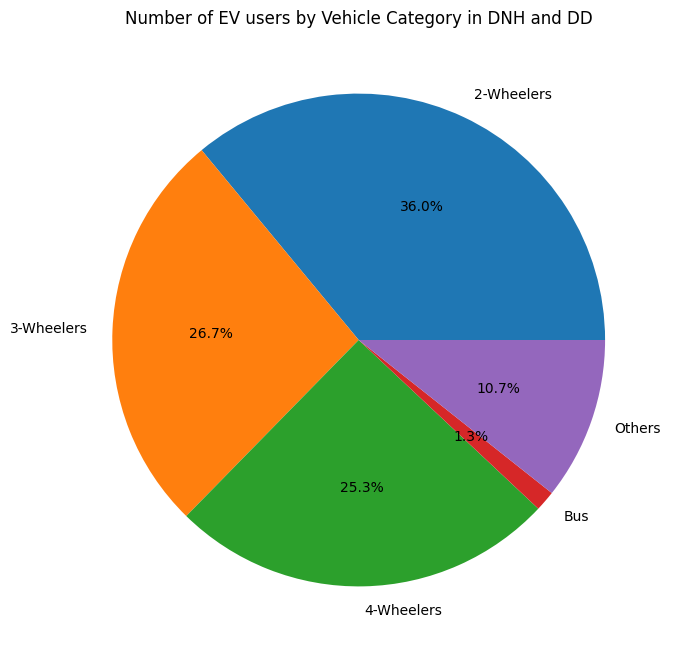

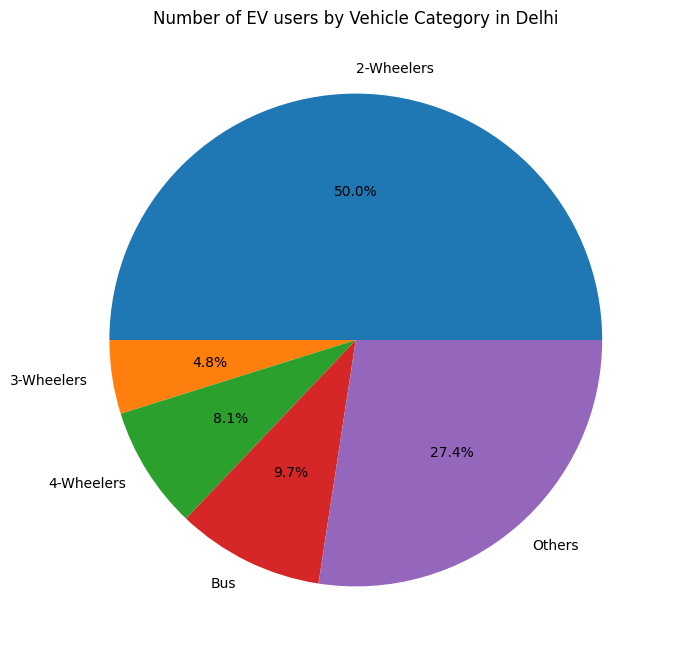

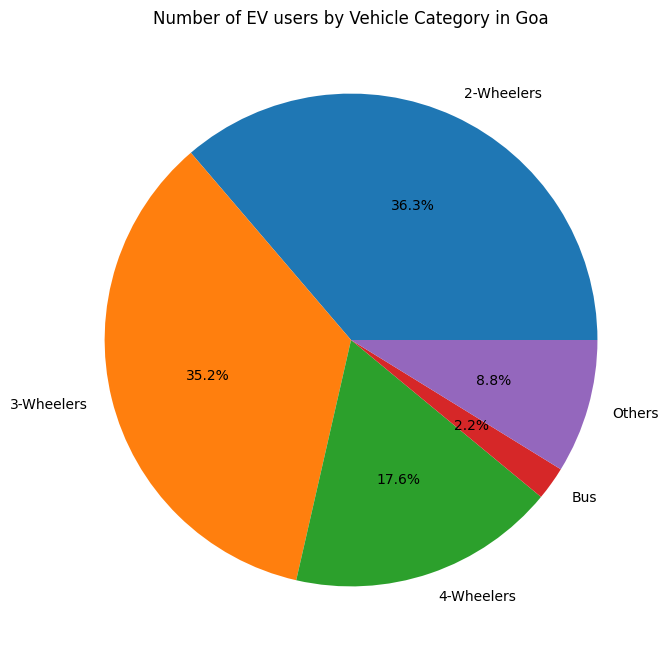

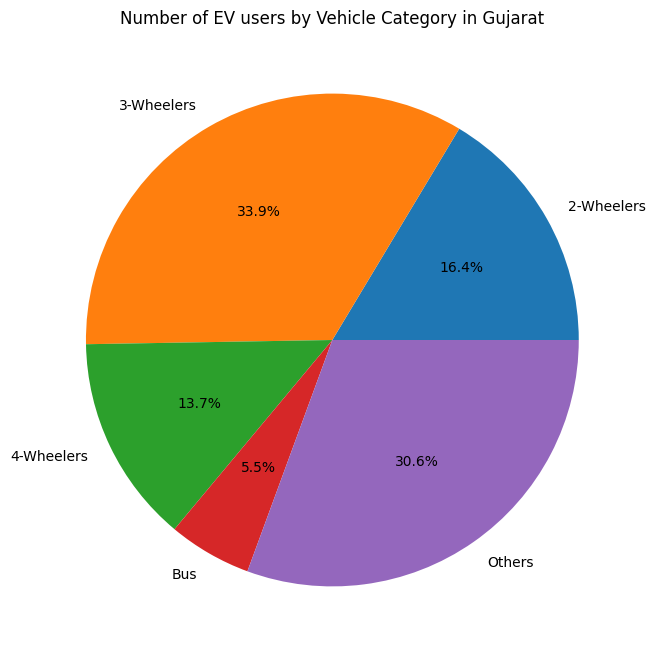

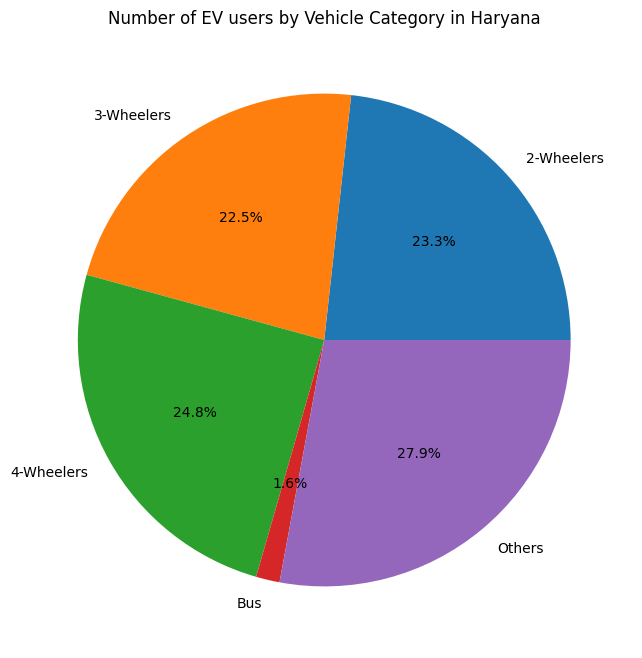

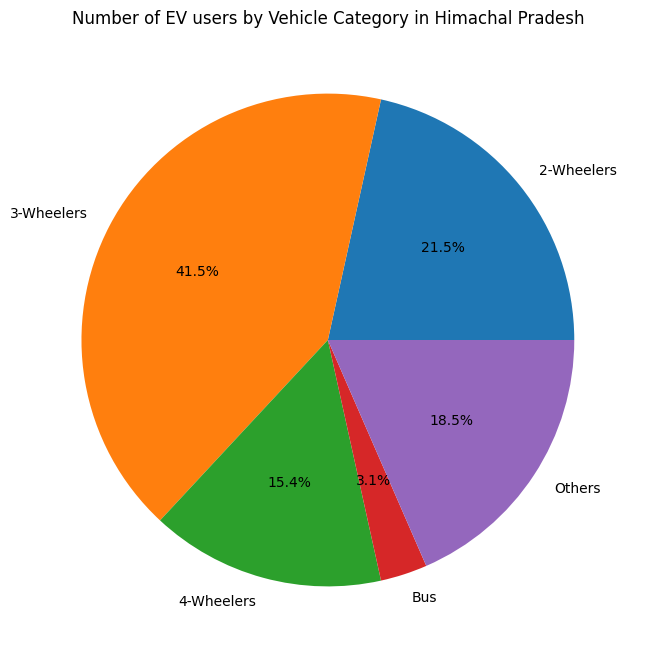

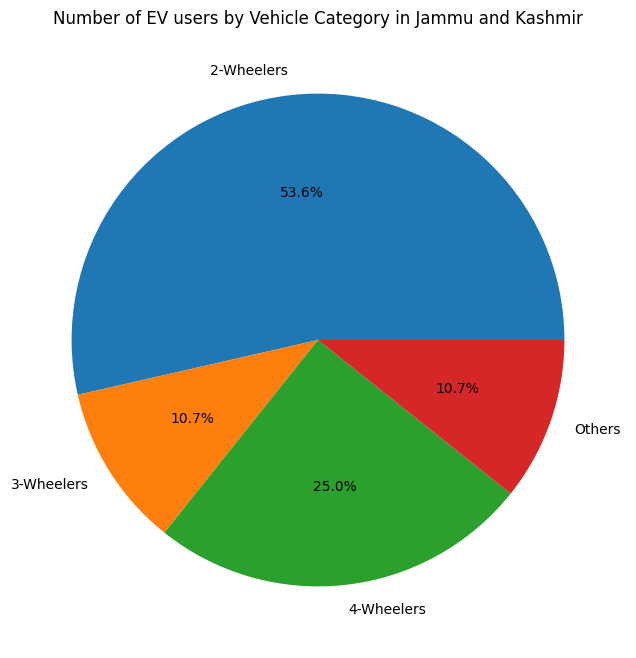

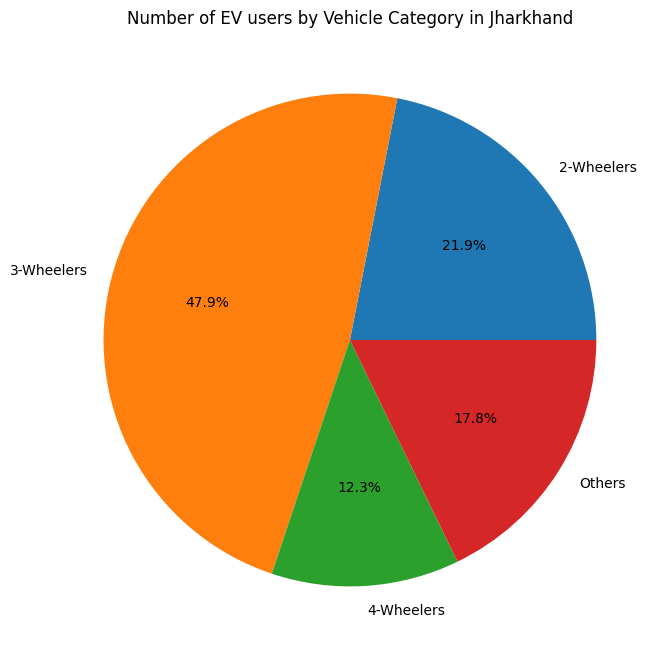

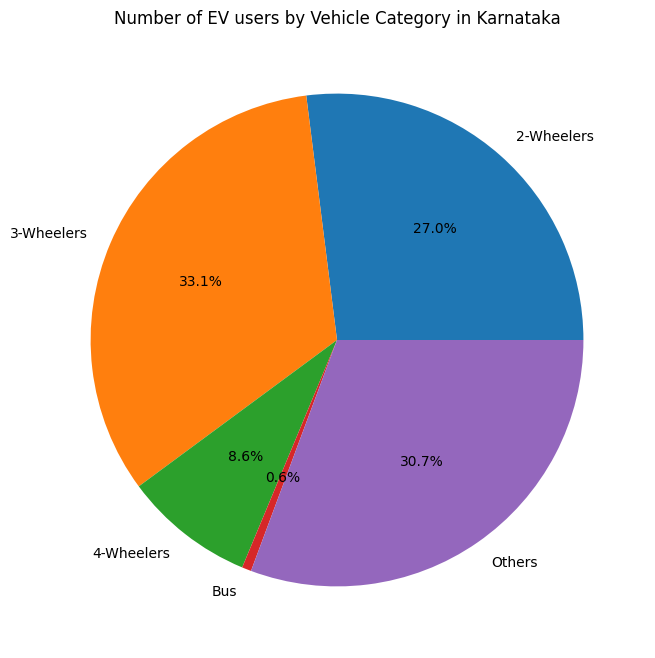

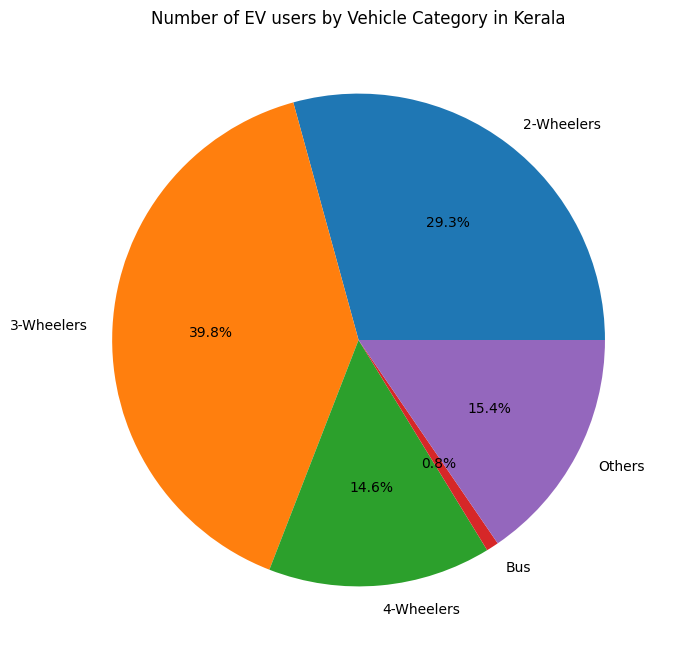

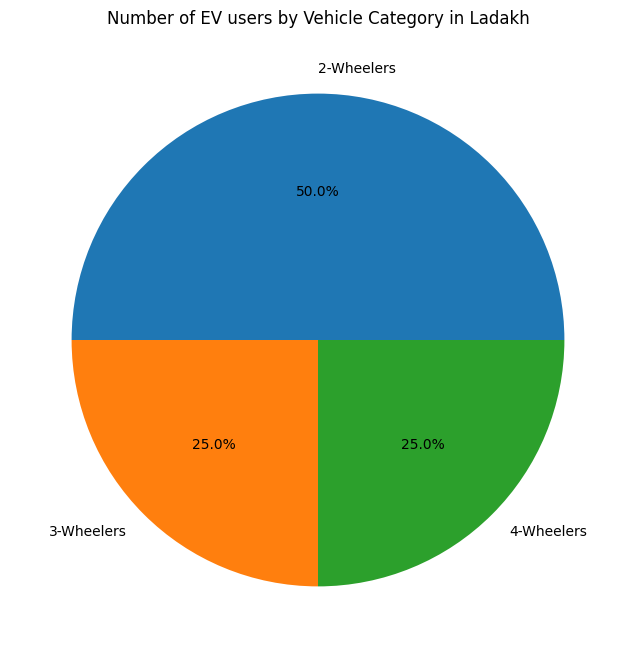

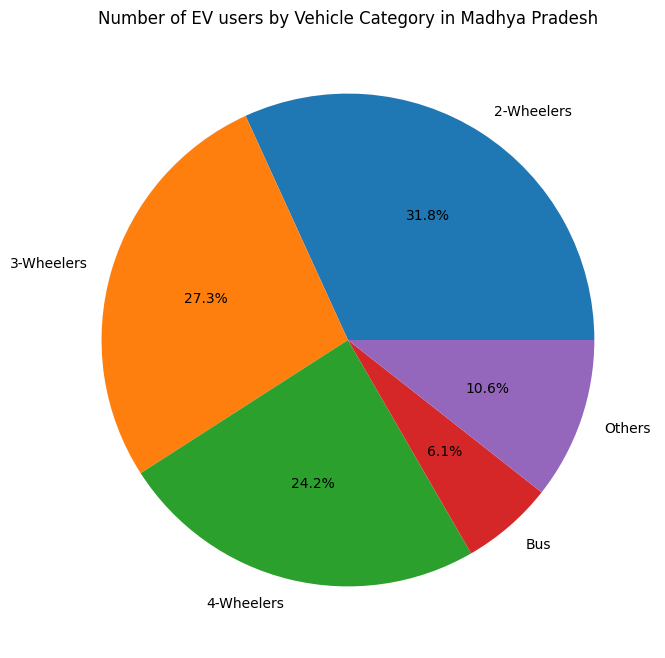

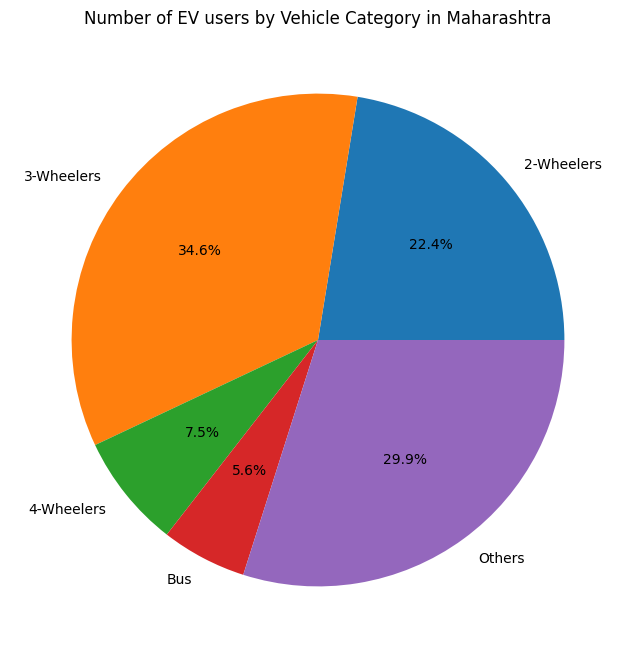

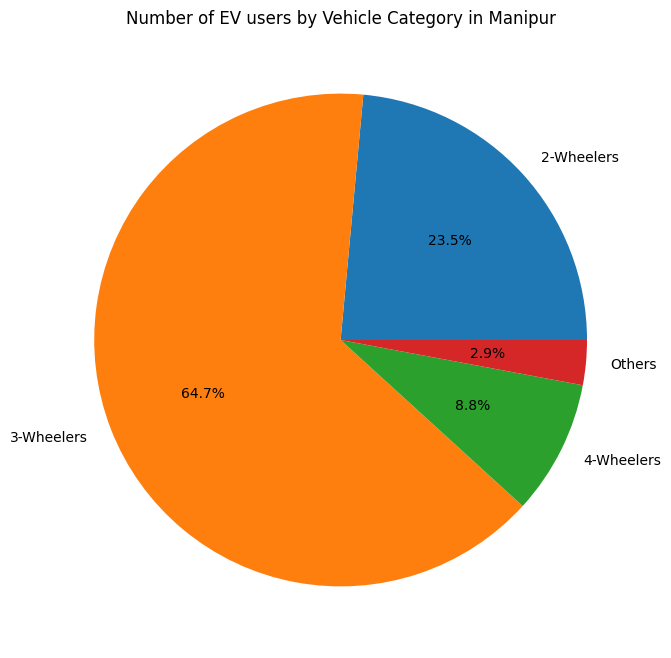

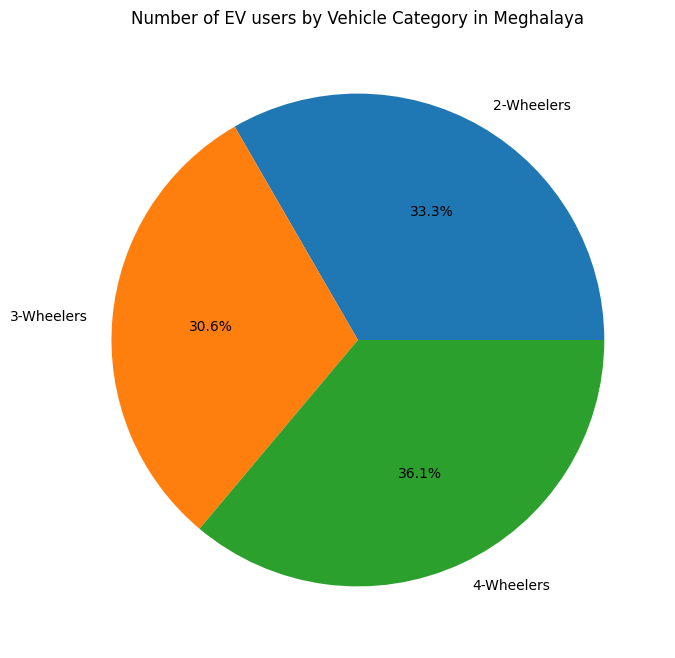

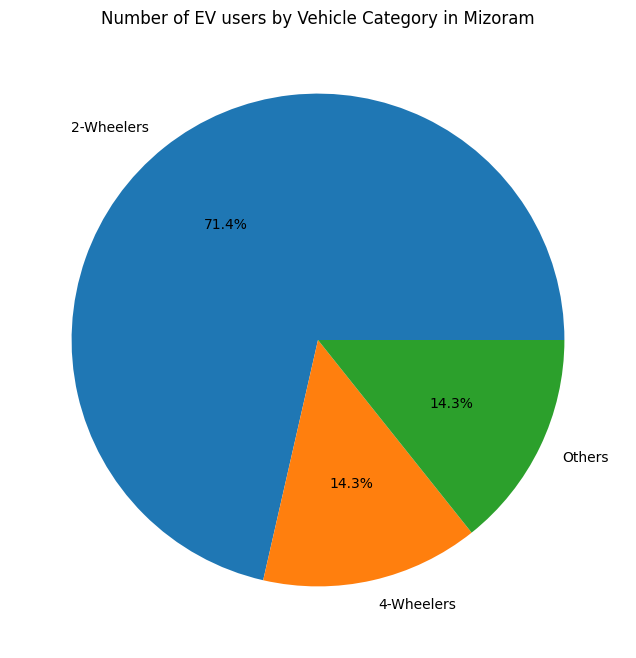

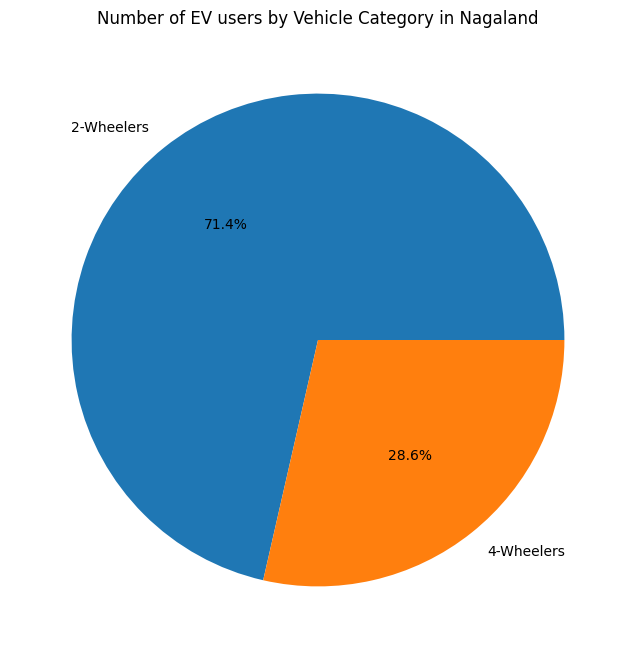

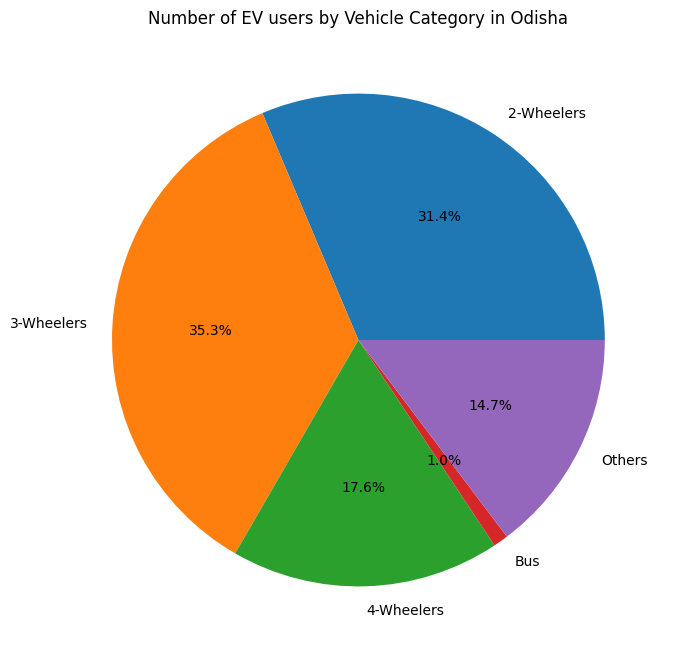

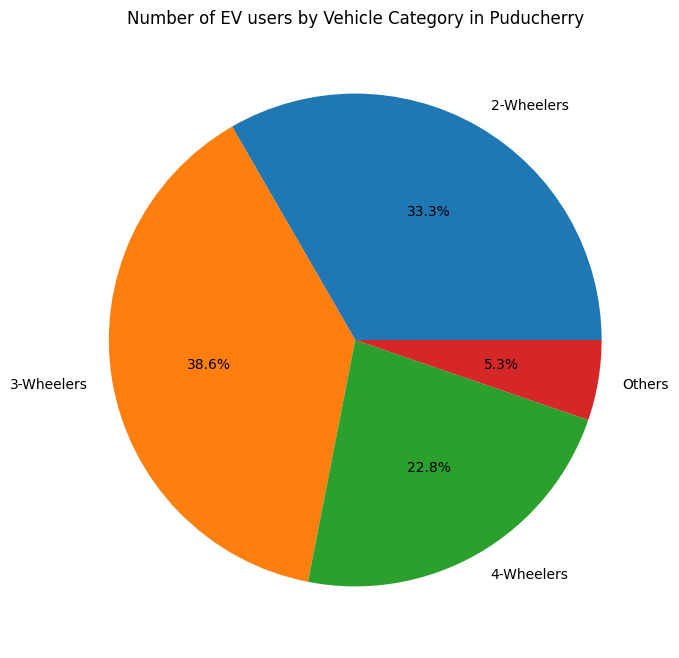

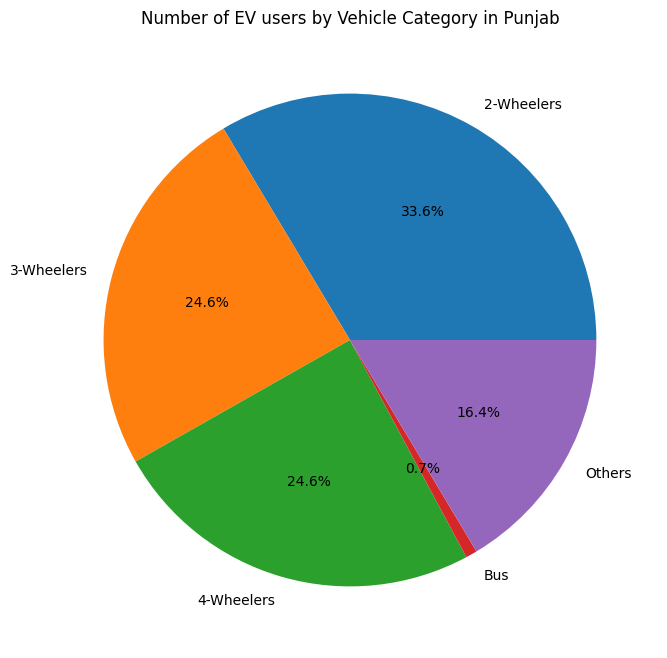

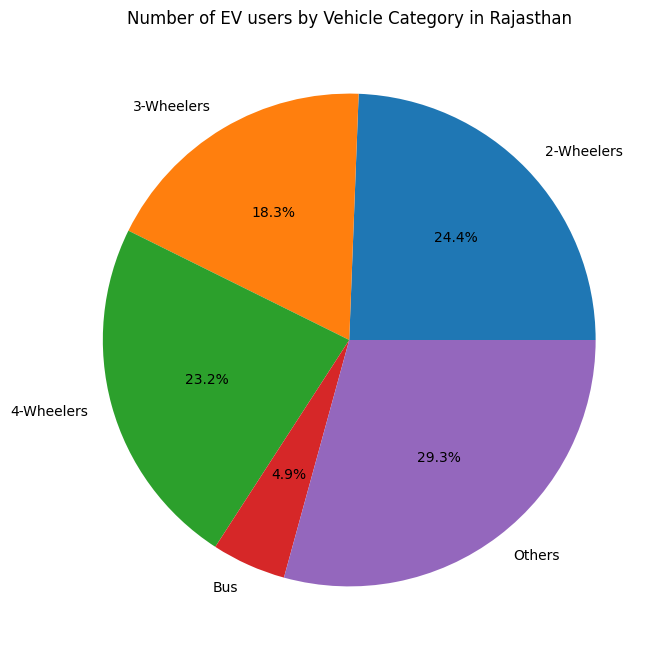

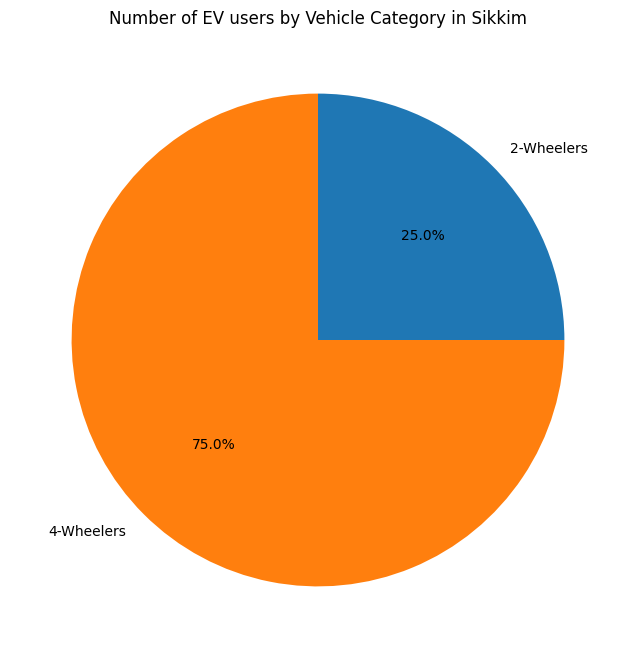

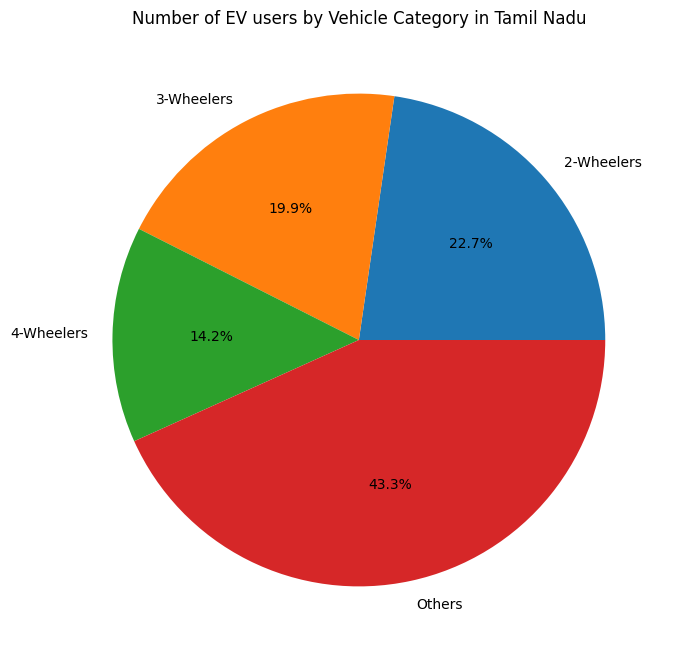

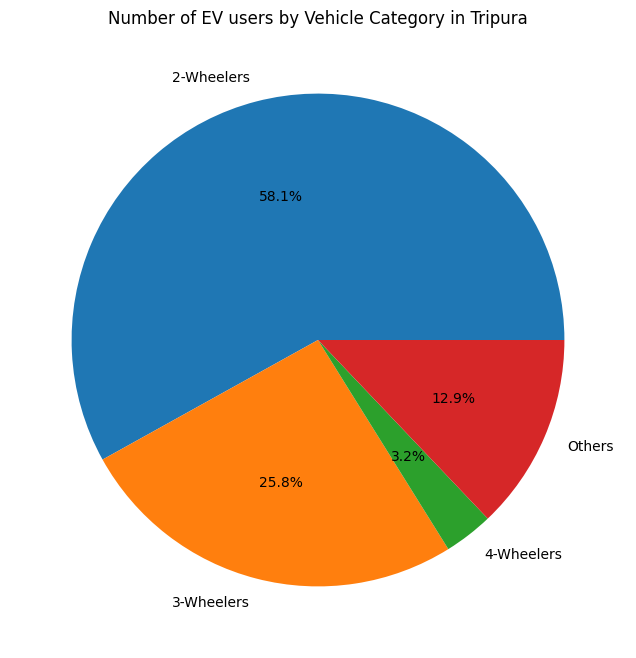

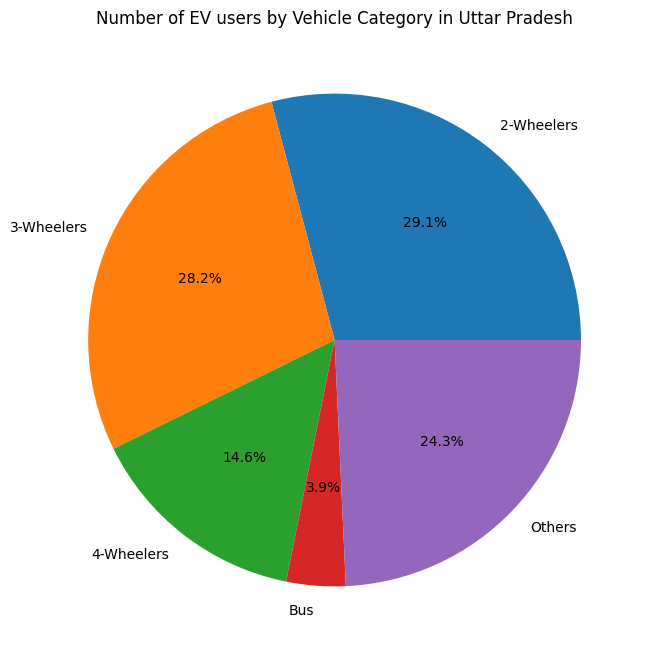

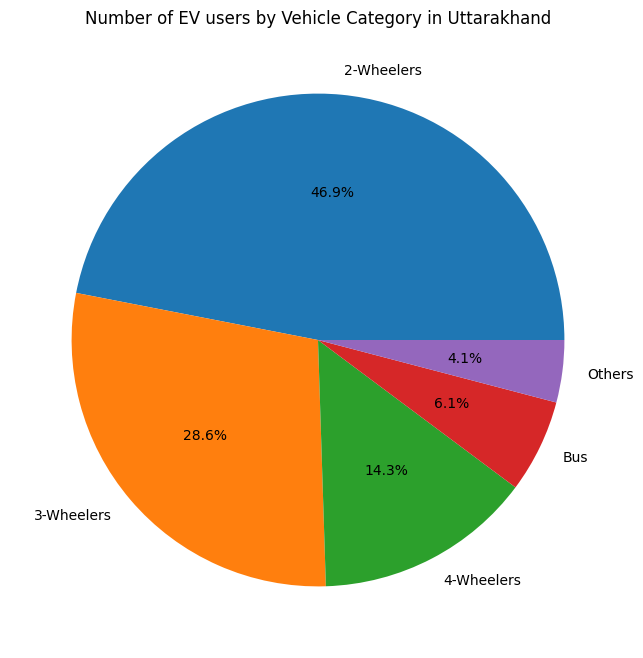

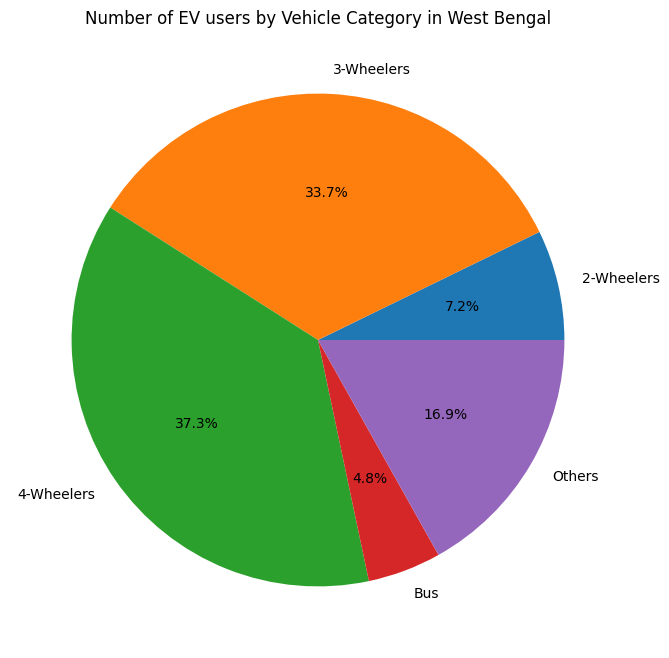

In [13]:


# Filter the data to only include rows where ELECTRIC(BOV) is 1
ev_df = df[df['ELECTRIC(BOV)'] == 1]

# Group the filtered data by State and Vehicle Category, and count the occurrences
ev_usage_by_state_category = ev_df.groupby(['State', 'Vehicle Category']).size()

# Generate a pie chart for each state
for state in ev_usage_by_state_category.index.get_level_values('State').unique():
    state_data = ev_usage_by_state_category.loc[state]
    plt.figure(figsize=(10,8))
    plt.pie(state_data, labels = state_data.index.get_level_values('Vehicle Category'), autopct='%1.1f%%')
    plt.title(f'Number of EV users by Vehicle Category in {state}')
    plt.show()

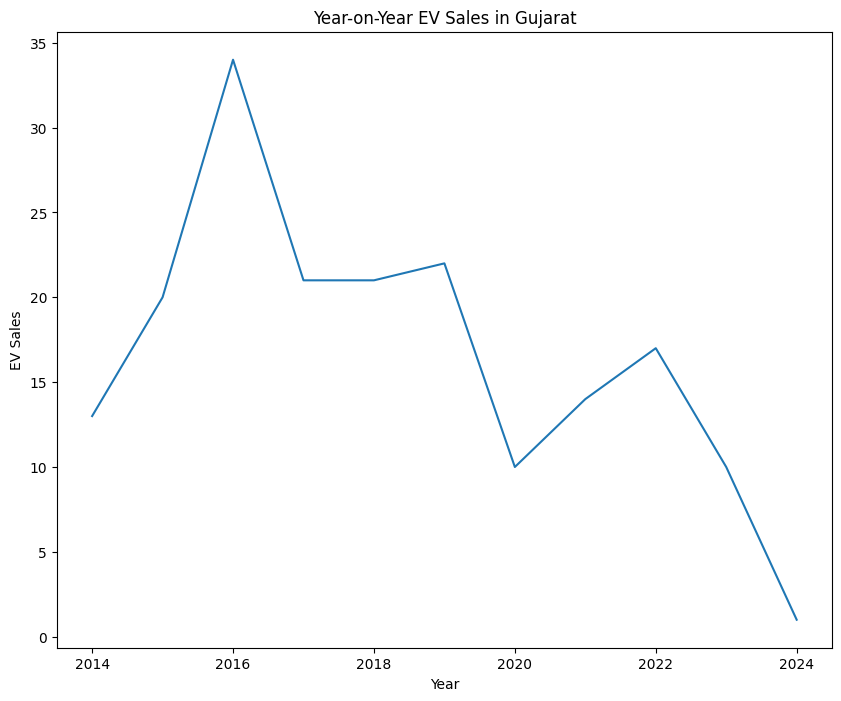

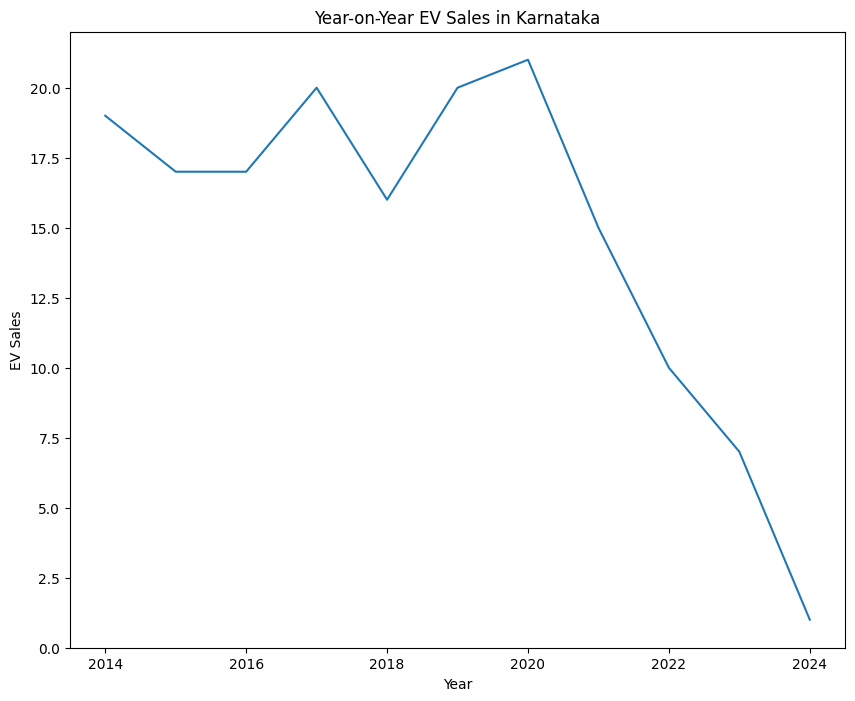

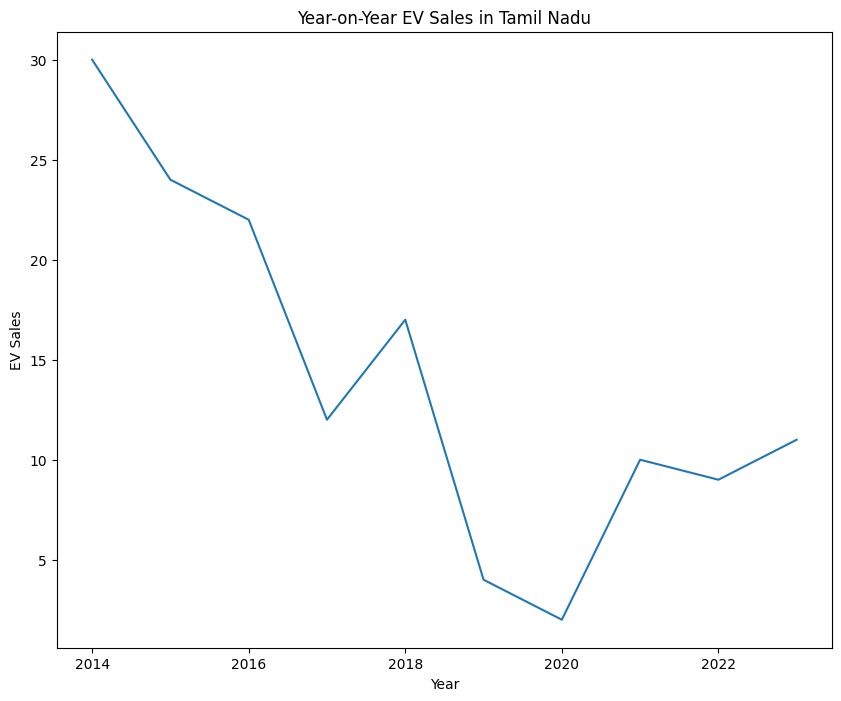

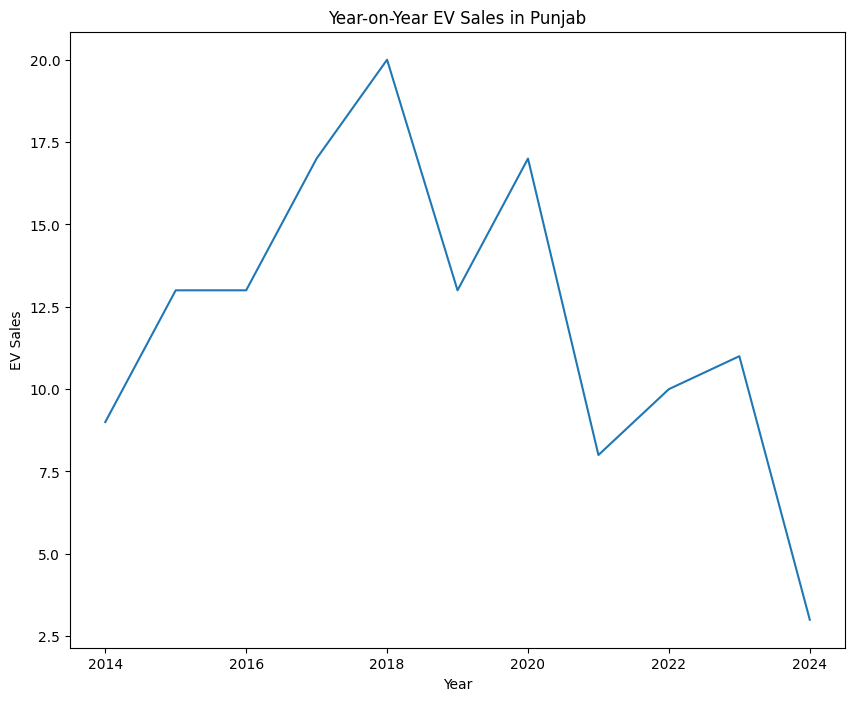

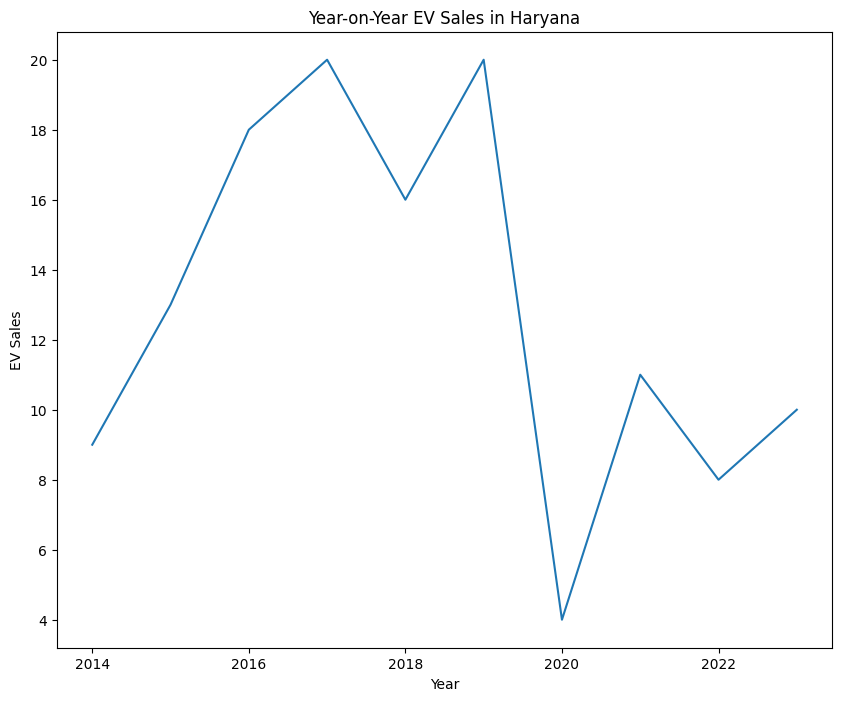

In [14]:

# Filter the data to only include rows where ELECTRIC(BOV) is 1
ev_df = df[df['ELECTRIC(BOV)'] == 1]

ev_sales_by_year_state = ev_df.groupby(['Year', 'State']).size().reset_index(name='EV Sales')
top_5_states = ev_sales_by_year_state.groupby('State')['EV Sales'].sum().sort_values(ascending=False).head(5).index

for state in top_5_states:
    state_data = ev_sales_by_year_state[ev_sales_by_year_state['State'] == state]
    plt.figure(figsize=(10,8))
    plt.plot(state_data['Year'], state_data['EV Sales'])
    plt.title(f'Year-on-Year EV Sales in {state}')
    plt.xlabel('Year')
    plt.ylabel('EV Sales')
    plt.show()

                       State                           Cluster
0   Andaman & Nicobar Island                  Emerging Markets
1             Andhra Pradesh               Established Markets
2          Arunachal Pradesh                  Emerging Markets
3                      Assam               Established Markets
4                      Bihar               Established Markets
5                 Chandigarh               Established Markets
6               Chhattisgarh               Established Markets
7                 DNH and DD               Established Markets
8                      Delhi     Two-Wheeler Dominated Markets
9                        Goa               Established Markets
10                   Gujarat     Two-Wheeler Dominated Markets
11                   Haryana     Two-Wheeler Dominated Markets
12          Himachal Pradesh               Established Markets
13         Jammu and Kashmir                  Emerging Markets
14                 Jharkhand               Established 

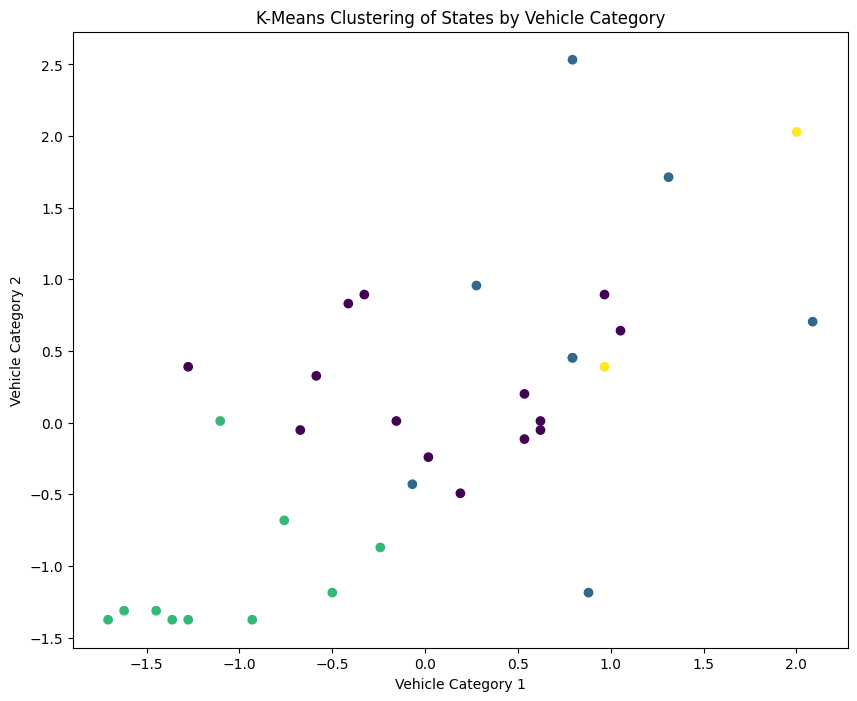

In [15]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Filter the data to only include rows where ELECTRIC(BOV) is 1
ev_df = df[df['ELECTRIC(BOV)'] == 1]

# Group the filtered data by State and Vehicle Category, and count the occurrences
ev_sales_by_state_category = ev_df.groupby(['State', 'Vehicle Category']).size().reset_index(name='EV Sales')

# Pivot the data to create a matrix of states vs vehicle categories
state_category_matrix = ev_sales_by_state_category.pivot(index='State', columns='Vehicle Category', values='EV Sales')

# Fill missing values with 0
state_category_matrix.fillna(0, inplace=True)

# Scale the data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
state_category_matrix_scaled = scaler.fit_transform(state_category_matrix)

# Perform K-Means clustering with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(state_category_matrix_scaled)

# Create a DataFrame with the cluster assignments
cluster_df = pd.DataFrame({'State': state_category_matrix.index, 'Cluster': clusters})

# Map the cluster numbers to the desired cluster names
cluster_df['Cluster'] = cluster_df['Cluster'].map({0: 'Established Markets', 1: 'Two-Wheeler Dominated Markets', 2: 'Emerging Markets', 3: 'Niche Commercial Vehicle Markets'})

# Print the cluster assignments
print(cluster_df)

# Plot the clusters
plt.figure(figsize=(10,8))
plt.scatter(state_category_matrix_scaled[:, 0], state_category_matrix_scaled[:, 1], c=clusters)
plt.title('K-Means Clustering of States by Vehicle Category')
plt.xlabel('Vehicle Category 1')
plt.ylabel('Vehicle Category 2')
plt.show()

In [16]:


# Filter the data to only include rows where ELECTRIC(BOV) is 1
ev_df = df[df['ELECTRIC(BOV)'] == 1]

# Group the filtered data by State and Vehicle Category, and count the occurrences
ev_sales_by_state_category = ev_df.groupby(['State', 'Vehicle Category']).size().reset_index(name='EV Sales')

# Pivot the data to create a matrix of states vs vehicle categories
state_category_matrix = ev_sales_by_state_category.pivot(index='State', columns='Vehicle Category', values='EV Sales')

# Fill missing values with 0
state_category_matrix.fillna(0, inplace=True)

# Scale the data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
state_category_matrix_scaled = scaler.fit_transform(state_category_matrix)

# Perform K-Means clustering with 4 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(state_category_matrix_scaled)

# Create a DataFrame with the cluster assignments
cluster_df = pd.DataFrame({'State': state_category_matrix.index, 'Cluster': clusters})

# Map the cluster numbers to the desired cluster names
cluster_df['Cluster'] = cluster_df['Cluster'].map({0: 'Established Markets', 1: 'Two-Wheeler Dominated Markets', 2: 'Emerging Markets', 3: 'Niche Commercial Vehicle Markets'})

# Calculate the cluster characteristics
cluster_characteristics = []
for cluster in cluster_df['Cluster'].unique():
    cluster_states = cluster_df[cluster_df['Cluster'] == cluster]['State']
    average_sales_volume = state_category_matrix.loc[cluster_states].mean().mean()
    total_potential_customer_base = average_sales_volume * len(cluster_states)
    target_price_range = 1000000 if cluster == 'Established Markets' else 500000
    potential_profit = total_potential_customer_base * target_price_range / 10000000
    cluster_characteristics.append({
        'Cluster': cluster,
        'States': len(cluster_states),
        'Average Sales Volume per State': average_sales_volume,
        'Total Potential Customer Base': total_potential_customer_base,
        'Target Price Range': target_price_range,
        'Potential Profit': potential_profit
    })

# Print the cluster characteristics
for cluster in cluster_characteristics:
    print(f"Cluster {cluster['Cluster']}")
    print(f"States: {cluster['States']}")
    print(f"Average Sales Volume per State: {cluster['Average Sales Volume per State']} units")
    print(f"Total Potential Customer Base: {cluster['Total Potential Customer Base']} units")
    print(f"Target Price Range: ₹{cluster['Target Price Range']:,} per unit")
    print(f"Potential Profit: ₹{cluster['Potential Profit']:,} Crores")
    print()

# Calculate the total potential profit
total_potential_profit = sum(cluster['Potential Profit'] for cluster in cluster_characteristics)
print(f"Total Potential Profit: ₹{total_potential_profit:,} Crores")

Cluster Emerging Markets
States: 10
Average Sales Volume per State: 3.78 units
Total Potential Customer Base: 37.8 units
Target Price Range: ₹500,000 per unit
Potential Profit: ₹1.89 Crores

Cluster Established Markets
States: 14
Average Sales Volume per State: 15.214285714285714 units
Total Potential Customer Base: 213.0 units
Target Price Range: ₹1,000,000 per unit
Potential Profit: ₹21.3 Crores

Cluster Two-Wheeler Dominated Markets
States: 8
Average Sales Volume per State: 23.075 units
Total Potential Customer Base: 184.6 units
Target Price Range: ₹500,000 per unit
Potential Profit: ₹9.23 Crores

Cluster Niche Commercial Vehicle Markets
States: 2
Average Sales Volume per State: 30.4 units
Total Potential Customer Base: 60.8 units
Target Price Range: ₹500,000 per unit
Potential Profit: ₹3.04 Crores

Total Potential Profit: ₹35.46 Crores


In [18]:
import pandas as pd


# Filter the data to only include rows where ELECTRIC(BOV) is 1
ev_df = df[df['ELECTRIC(BOV)'] == 1]

# Group the filtered data by State and Vehicle Category, and count the occurrences
ev_sales_by_state_category = ev_df.groupby(['State', 'Vehicle Category']).size().reset_index(name='EV Sales')

# Pivot the data to create a matrix of states vs vehicle categories
state_category_matrix = ev_sales_by_state_category.pivot(index='State', columns='Vehicle Category', values='EV Sales')

# Fill missing values with 0
state_category_matrix.fillna(0, inplace=True)

# Scale the data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
state_category_matrix_scaled = scaler.fit_transform(state_category_matrix)

# Perform K-Means clustering with 4 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(state_category_matrix_scaled)

# Create a DataFrame with the cluster assignments
cluster_df = pd.DataFrame({'State': state_category_matrix.index, 'Cluster': clusters})

# Map the cluster numbers to the desired cluster names
cluster_df['Cluster'] = cluster_df['Cluster'].map({0: 'Established Markets', 1: 'Two-Wheeler Dominated Markets', 2: 'Emerging Markets', 3: 'Niche Commercial Vehicle Markets'})

# Calculate the dominant vehicle type for each cluster
dominant_vehicle_types = []
for cluster in cluster_df['Cluster'].unique():
    cluster_states = cluster_df[cluster_df['Cluster'] == cluster]['State']
    vehicle_sales = state_category_matrix.loc[cluster_states].sum()
    dominant_vehicle_type = vehicle_sales.idxmax()
    dominant_vehicle_type_sales = vehicle_sales.max()
    dominant_vehicle_types.append({
        'Cluster': cluster,
        'Dominant Vehicle Type': dominant_vehicle_type,
        'Dominant Vehicle Type Sales': dominant_vehicle_type_sales
    })

# Create a DataFrame with the dominant vehicle types
dominant_vehicle_types_df = pd.DataFrame(dominant_vehicle_types)

# Print the dominant vehicle types
print(dominant_vehicle_types_df)

                            Cluster Dominant Vehicle Type  \
0                  Emerging Markets            2-Wheelers   
1               Established Markets            3-Wheelers   
2     Two-Wheeler Dominated Markets            3-Wheelers   
3  Niche Commercial Vehicle Markets                Others   

   Dominant Vehicle Type Sales  
0                         81.0  
1                        357.0  
2                        257.0  
3                        111.0  
